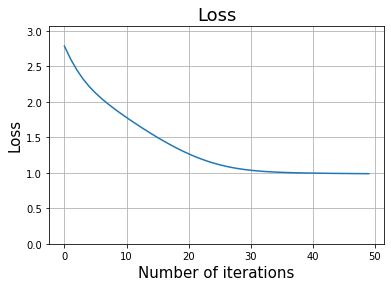

In [50]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris.data[:, :2]  
y = iris.target
Y = np.eye(3)[y]

LEARNING_RATE = 0.01
NUM_EPOCHS = 50

def get_loss(y, a):
  return -1 * np.sum(y * np.log(a))

def get_loss_numerically_stable(y, z):
   return -1 * np.sum(y * (z + (-z.max() - np.log(np.sum(np.exp(z-z.max()))))))

def get_gradients(x, z, a, y):
  da = (-y / a)

  matrix = np.matmul(a, np.ones((1, 3))) * (np.identity(3) - np.matmul(np.ones((3, 1)), a.T))
  dz = np.matmul(matrix, da)

  dW = dz * x.T
  db = dz.copy()

  return dz, dW, db

def gradient_descent(W, b, dW, db, learning_rate):
  W = W - learning_rate * dW
  b = b - learning_rate * db
  return W, b

def forward_propagate(x, W, b):
  # W is 3 x 2
  # x is 2 x 1
  # b is 3 x 1
  z = np.matmul(W, x) + b
  a = stable_softmax(z)
  # z is 3 x 1
  # a is 3 x 1
  return z, a

def stable_softmax(z):
  # z is 3 x 1
  a = np.exp(z - max(z)) / np.sum(np.exp(z - max(z)))
  # a is 3 x 1
  return a


# random initialization
W_initial = np.random.rand(3, 2)
W = W_initial.copy()
b = np.zeros((3, 1))

W_cache = []
b_cache = []
L_cache = []

for i in range(NUM_EPOCHS):
  dW = np.zeros(W.shape)
  db = np.zeros(b.shape)
  L = 0
  for j in range(X.shape[0]):
    x_j = X[j,:].reshape(2,1)
    y_j = Y[j,:].reshape(3,1)

    z_j, a_j = forward_propagate(x_j, W, b)
    loss_j = get_loss_numerically_stable(y_j, z_j)
    dZ_j, dW_j, db_j = get_gradients(x_j, z_j, a_j, y_j)

    dW += dW_j
    db += db_j
    L += loss_j

  dW = (1/X.shape[0]) * dW # (1.0/17) * dw
  db = (1/X.shape[0]) * db # (1.0/17) * db
  
  L = (1/X.shape[0]) * L # (1.0/17) * loss

  W, b = gradient_descent(W, b, dW, db, LEARNING_RATE)

  W_cache.append(W)
  b_cache.append(b)
  L_cache.append(L)

plt.grid()
plt.title('Loss', size=18)
plt.xlabel('Number of iterations', size=15)
plt.ylabel('Loss', size=15)
plt.ylim([0, max(L_cache) * 1.1])
plt.plot(L_cache)

plt.savefig('image.png')


In [55]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

iris_data = load_iris() # load the iris dataset

print('Example data: ')
print(iris_data.data[:5])
print('Example labels: ')
print(iris_data.target[:5])

x = iris_data.data[:, :2] 
y_ = iris_data.target.reshape(-1, 1) # Convert data to a single column


# One Hot encode the class labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)
print('all of y')
print(y)

# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20)

# Build the model

model = Sequential()

model.add(Dense(10, activation='relu', name='fc1'))  # input_shape=(4,)
model.add(Dense(10, activation='relu', name='fc2'))
model.add(Dense(3, activation='softmax', name='output'))

# Adam optimizer with learning rate of 0.001
optimizer = Adam(lr=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print('Neural Network Model Summary: ')
#print(model.summary())

# Train the model
model.fit(train_x, train_y, verbose=2, batch_size=5, epochs=200)

# Test on unseen data

results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

Example data: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Example labels: 
[0 0 0 0 0]
all of y
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]